In [12]:
import pandas 
import numpy as np 
import math
import matplotlib.pyplot as plt

df =  pandas.read_csv("data/faithful.csv")
print(df)



     eruptions  waiting
0        3.600       79
1        1.800       54
2        3.333       74
3        2.283       62
4        4.533       85
..         ...      ...
267      4.117       81
268      2.150       46
269      4.417       90
270      1.817       46
271      4.467       74

[272 rows x 2 columns]


(1a)

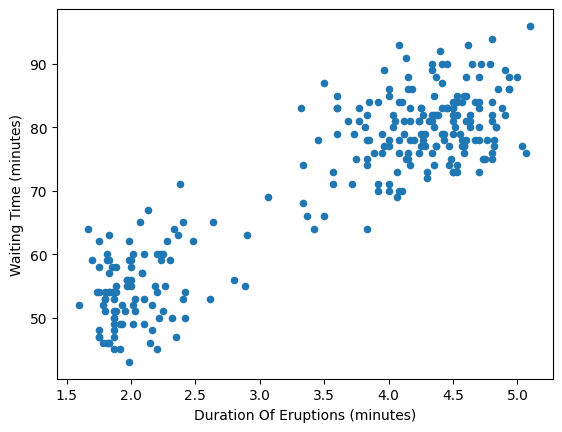

In [3]:

def plot_scatter():
    df_scatter = df.plot.scatter(x ="eruptions", y= "waiting")
    df_scatter.set_xlabel("Duration Of Eruptions (minutes)")
    df_scatter.set_ylabel("Waiting Time (minutes)")

plot_scatter()

Yes, I definetly do think there is a relationship between waiting time and eruption time, as the duration of eruptioins increased the waiting time between also increased

(1b)

In [4]:
df_means= df.mean(axis = 0)
eruptions_mean = df_means.iloc[0] 
waiting_mean = df_means.iloc[1]


print("mean of eruptions column:",eruptions_mean)
print("mean of waiting column:",waiting_mean)

centered_df= df.copy() # centered_df
centered_df["X"] = centered_df["eruptions"] - eruptions_mean
centered_df["Y"] = centered_df["waiting"] - waiting_mean

centered_X = np.asarray(centered_df["X"])
centered_Y = np.asarray(centered_df["Y"])

mean of eruptions column: 3.4877830882352936
mean of waiting column: 70.8970588235294


(1c)

In [5]:
# functino take in 2 numpy arrays

def innerproduct(x,y):
    return np.sum(x*y)

def magnitude(x):
    return math.sqrt(np.sum(x ** 2))

#2 centered arrays
def correlation(x,y):
    return innerproduct(x,y)/(magnitude(x)*magnitude(y))

eruptions_arr =  np.asarray(centered_df["eruptions"])
waiting_arr = np.asarray(centered_df["waiting"])

print("Correlation:", correlation(centered_X,centered_Y))

Correlation: 0.9008111683218128


(1d)

Slope 10.729641395133523
Y-intercept 33.474397022753365


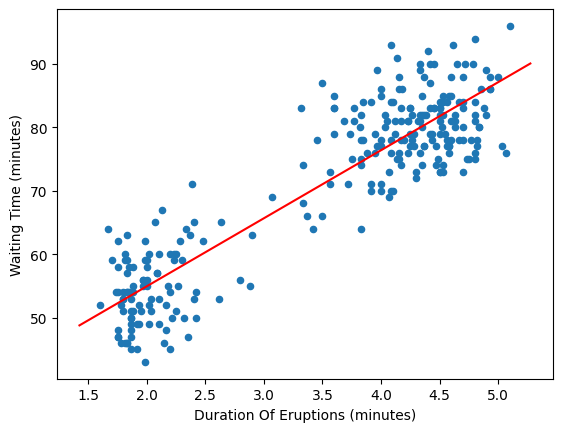

In [6]:
def slope(x_center,y_center):
    return(innerproduct(x_center,y_center)/(magnitude(x_center) ** 2))


def yint(x_mean,y_mean,x_center,y_center):
    return y_mean - slope(x_center,y_center)*x_mean

df_slope = slope(centered_df['X'],centered_df["Y"])
df_yint = yint(eruptions_mean,waiting_mean,centered_X,centered_Y)
print("Slope",df_slope)
print("Y-intercept",df_yint)

##found this function on stackoverflow link is here: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept ##

def plotreg(slope, intercept):
    
    plot_scatter()
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color = 'red')

plotreg(df_slope,df_yint)

The slope of the regression line and the correlation are both positive and the value of the slope is around 10.7

(1e)

In [7]:
def prediction(x_value):
    return df_slope*x_value + df_yint

print(prediction(2.2),"minutes before next eruption")



57.07960809204712 minutes before next eruption


(1f)

In [54]:
#total variance in Y
def SST():
    return np.sum((waiting_arr - waiting_mean)**2)



#explained variance in Y
def SSR():
    return np.sum((prediction(eruptions_arr) - waiting_mean)**2)


#unexplained variance in Y
def SSE():
    return np.sum((prediction(eruptions_arr)-waiting_arr)**2)


def Rsquared():
    return 1-(SSE()/SST())
    

print("R-Squared:",Rsquared())




R-Squared: 0.8114607609733097


(2a)

Text(0.5, 1.0, 'Plot of A1 and A2')

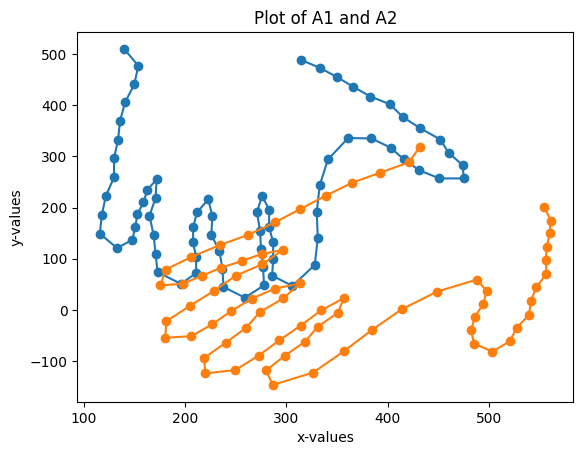

In [9]:
A1 = np.asarray(pandas.read_csv("data/hand1.dat"))
A2 = np.asarray(pandas.read_csv("data/hand2.dat"))

plt.plot(A1[:,0],A1[:,1],  '-o')
plt.plot( A2[:,0], A2[:,1], '-o')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title("Plot of A1 and A2")

(2b)

In [68]:

A1TA2 = A1.transpose() @ A2

U,S, Vt = np.linalg.svd(A2.transpose()@A1, full_matrices=True)

R =  U @ Vt # matrix multiplication

print(R)

#getting the angle using R instead of dot & cross products
angle = np.arccos((np.trace(R)-1)/2) *(180/math.pi)
print(np.trace(R))
print("angle:", angle,"degrees")


    


[[ 0.80705314  0.59047881]
 [-0.59047881  0.80705314]]
1.6141062898517402
angle: 72.118271250522 degrees


(2c)

Text(0.5, 1.0, 'Plot of Rotated A1 and A2')

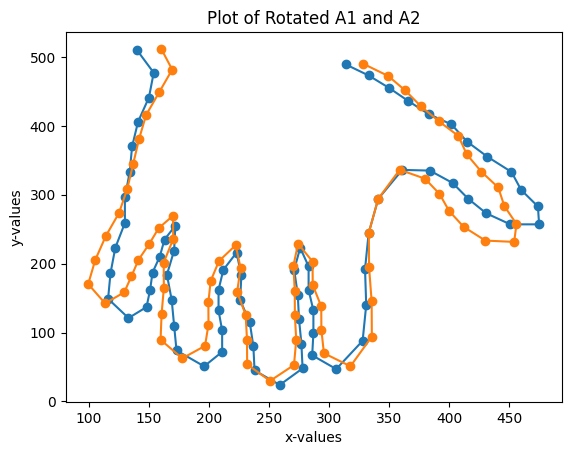

In [11]:

A2R = A2 @ R


plt.plot(A1[:,0],A1[:,1],  '-o')
plt.plot(A2R[:,0],A2R[:,1], '-o')
plt.xlabel('x-values')
plt.ylabel('y-values')
plt.title("Plot of Rotated A1 and A2")